# 1. Convert RSMI to ITS

In [6]:
from synkit.IO.chem_converter import rsmi_to_its
rsmi = "[CH:8]=1[S:9][CH:10]=[C:6]([C:5]#[C:4][CH2:3][N:2]([C:11]2=[CH:12][CH:13]=[CH:14][CH:15]=[CH:16]2)[CH3:1])[CH:7]=1.[OH2:17]>>[C:5]([N:2]([CH3:1])[C:11]1=[CH:12][CH:13]=[CH:14][CH:15]=[CH:16]1)([C:6]2=[CH:10][S:9][CH:8]=[CH:7]2)=[CH:4][CH:3]=[O:17]"
its = rsmi_to_its(rsmi)

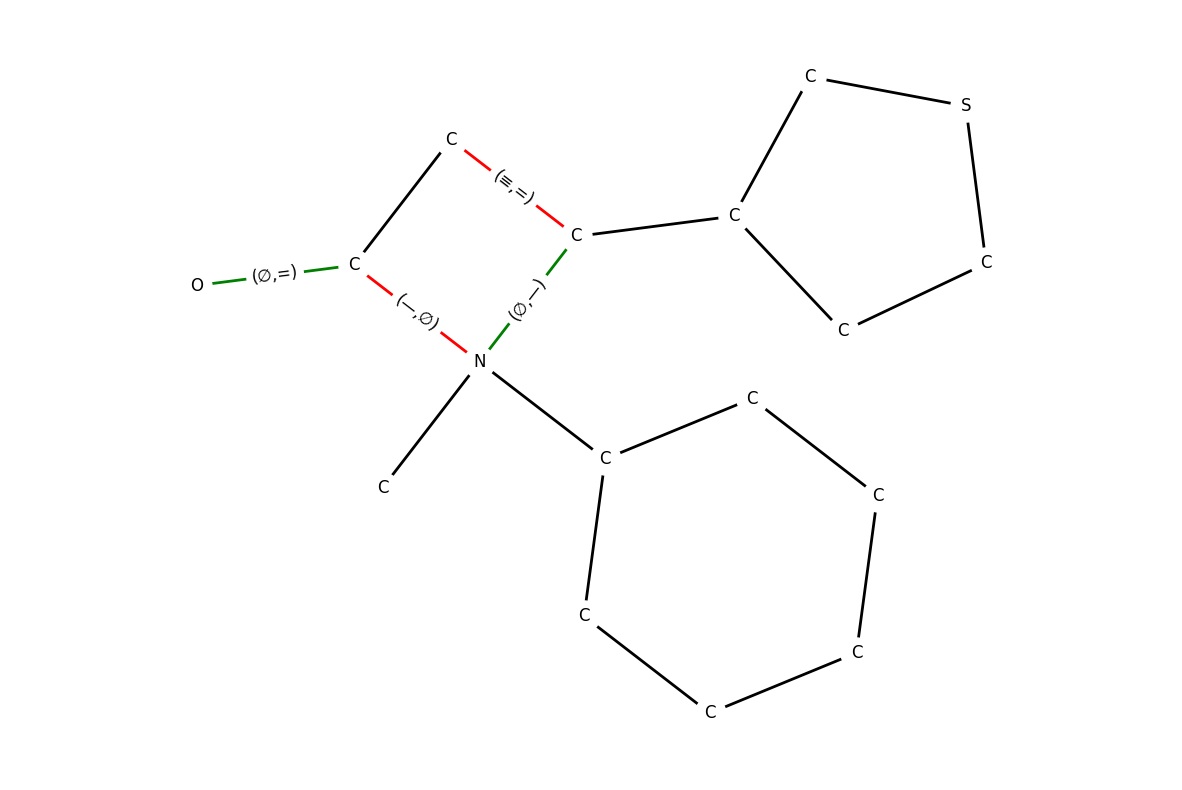

In [12]:
import matplotlib.pyplot as plt
from synkit.Vis.graph_visualizer import GraphVisualizer

fig, ax = plt.subplots(1,1, figsize = (15,10))
vis = GraphVisualizer()
vis.plot_its(its, ax,  use_edge_color=True)

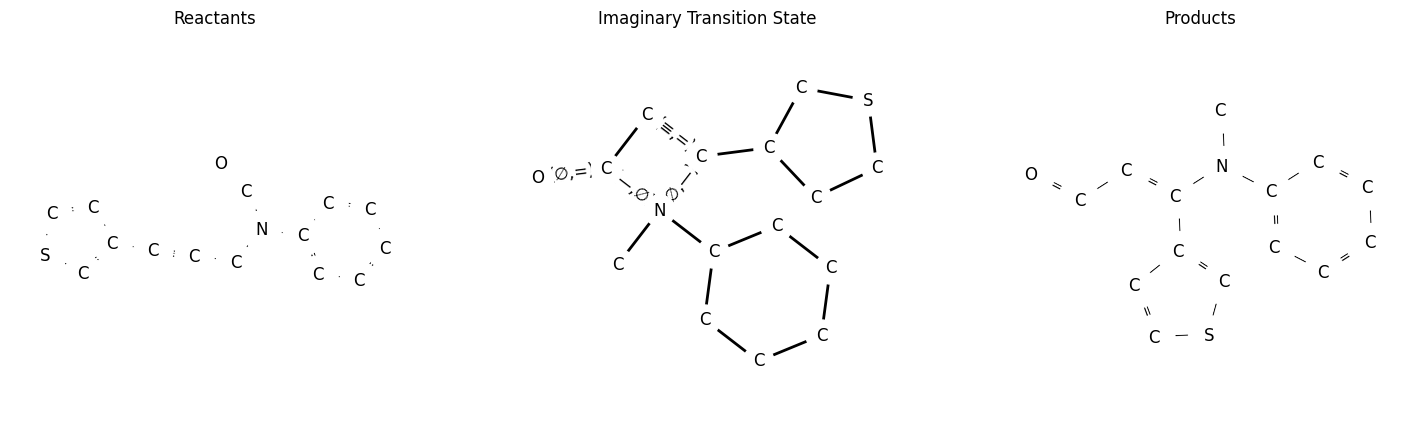

In [14]:
from synkit.Vis.rsmi_to_fig import three_graph_vis
fig = three_graph_vis(rsmi)

# 2. Compare AAMs

In [15]:
from synkit.Graph.ITS.aam_validator import AAMValidator
true_pair = (
            "[CH:8]=1[S:9][CH:10]=[C:6]([C:5]#[C:4][CH2:3][N:2]([C:11]2=[CH:12][CH:13]=[CH:14][CH:15]=[CH:16]2)[CH3:1])[CH:7]=1.[OH2:17]>>[C:5]([N:2]([CH3:1])[C:11]1=[CH:12][CH:13]=[CH:14][CH:15]=[CH:16]1)([C:6]2=[CH:10][S:9][CH:8]=[CH:7]2)=[CH:4][CH:3]=[O:17]",
            "[OH2:17].[cH:12]1[cH:13][cH:14][cH:15][cH:16][c:11]1[N:2]([CH3:1])[CH2:3][C:4]#[C:5][c:6]1[cH:10][s:9][cH:8][cH:7]1>>[cH:12]1[cH:13][cH:14][cH:15][cH:16][c:11]1[N:2]([CH3:1])[C:5](=[CH:4][CH:3]=[O:17])[c:6]1[cH:10][s:9][cH:8][cH:7]1",
        )

AAMValidator.smiles_check(
                *true_pair, check_method="RC", ignore_aromaticity=False
            )

True

In [16]:
false_pair = (
            "[CH:8]=1[S:9][CH:10]=[C:6]([C:5]#[C:4][CH2:3][N:2]([C:11]2=[CH:12][CH:13]=[CH:14][CH:15]=[CH:16]2)[CH3:1])[CH:7]=1.[OH2:17]>>[C:5]([N:2]([CH3:1])[C:11]1=[CH:12][CH:13]=[CH:14][CH:15]=[CH:16]1)([C:6]2=[CH:10][S:9][CH:8]=[CH:7]2)=[CH:4][CH:3]=[O:17]",
            "[CH3:1][N:2]([CH2:3][C:4]#[C:5][c:7]1[cH:8][cH:9][s:10][cH:11]1)[c:12]1[cH:13][cH:14][cH:15][cH:16][cH:17]1.[OH2:6]>>[CH3:1][N:2]([C:3](=[CH:4][CH:5]=[O:6])[c:7]1[cH:8][cH:9][s:10][cH:11]1)[c:12]1[cH:13][cH:14][cH:15][cH:16][cH:17]1",
        )
AAMValidator.smiles_check(
                *false_pair, check_method="RC", ignore_aromaticity=False
            )

False

# 3. Training data

In [18]:
from synkit.IO.data_io import load_database

data = load_database('../../Data/smart.json.gz')
data[0]

{'R-id': 7873,
 'smart': '[CH3:1][C:2]([CH3:3])([CH3:4])[O:5][C:6](=[O:7])[N:8]1[CH2:9][CH2:11][N:12]([H:13])[CH2:14][CH2:10]1.[O:15]=[S:16](=[O:17])([c:18]1[cH:20][cH:22][cH:23][cH:24][cH:21]1)[N:19]1[CH2:25][CH2:27][O:28][c:29]2[c:26]1[cH:35][c:33]([Cl:34])[cH:32][c:30]2[Br:31]>>[CH3:1][C:2]([CH3:3])([CH3:4])[O:5][C:6](=[O:7])[N:8]1[CH2:9][CH2:11][N:12]([c:30]2[c:29]3[c:26]([cH:35][c:33]([Cl:34])[cH:32]2)[N:19]([S:16](=[O:15])(=[O:17])[c:18]2[cH:20][cH:22][cH:23][cH:24][cH:21]2)[CH2:25][CH2:27][O:28]3)[CH2:14][CH2:10]1.[H:13][Br:31]'}

# 4 Benchmarking data

In [19]:
import pandas as pd
df = pd.read_csv('../../Data/Benchmarking/golden.csv')
df.head()

,index,Reaction,Ground turth,LocalMapper,RXNMapper,GraphMapper,LocalMapper_Conf,RXNMapper_Conf,GraphMapper_Conf,Source
0,0,C=CCC(N)(c1ccccc1)c1ccccc1.O=CC(C(=O)N1CCOCC1)...,[NH2:1][C:2]([CH2:3][CH:4]=[CH2:5])([c:6]1[cH:...,[NH2:1][C:2]([CH2:5][CH:4]=[CH2:3])([c:6]1[cH:...,[CH2:1]=[CH:2][CH2:3][C:6]([NH2:5])([c:7]1[cH:...,[CH2:25]1[CH2:24][N:23]([CH2:28][CH2:27][O:26]...,False,0.547388,0,golden
1,1,C=CC(O)C(C)N.C=CCSCC(C)=O>>CC(=O)CSCC=CC(O)C(C)N,[CH3:1][C:2](=[O:3])[CH2:4][S:5][CH2:6][CH:7]=...,[CH3:1][C:2](=[O:3])[CH2:4][S:5][CH2:6][CH:7]=...,C=[CH:8][CH:9]([OH:10])[CH:11]([CH3:12])[NH2:1...,[CH3:1][C:2](=[O:3])[CH2:4][S:5][CH2:6][CH:7]=...,True,0.590589,0,golden
2,2,C=CCC(CCC(COCc1ccccc1)O[Si](C)(C)C(C)(C)C)OS(C...,[CH3:1][C:2]([CH3:3])([CH3:4])[Si:5]([CH3:6])(...,CC(C)(C)[Si](C)(C)[O:8][CH:9]([CH2:10][CH2:11]...,CC(C)(C)[Si](C)(C)O[CH:7]([CH2:6][CH2:5][CH:4]...,[CH3:1][C:2]([CH3:3])([CH3:4])[Si:5]([CH3:6])(...,False,0.368029,0,golden
3,3,CCOC(=O)CC(=O)OCC.O=[N+]([O-])C=Cc1ccc(Cl)cc1>...,[CH3:13][CH2:14][O:15][C:16](=[O:17])[CH2:18][...,[CH3:13][CH2:14][O:15][C:16](=[O:17])[CH2:18][...,[CH3:1][CH2:2][O:3][C:4](=[O:5])[CH2:6][C:7](=...,[CH3:1][CH2:2][O:3][C:4](=[O:5])[CH2:6][C:7](=...,True,0.895172,0,golden
4,4,CN(CC#Cc1ccsc1)c1ccccc1.O>>CN(C(=CC=O)c1ccsc1)...,[CH3:1][N:2]([CH2:3][C:4]#[C:5][c:6]1[cH:7][cH...,[CH3:1][N:2]([CH2:3][C:4]#[C:5][c:6]1[cH:7][cH...,[CH3:1][N:2]([CH2:3][C:4]#[C:5][c:7]1[cH:8][cH...,[OH2:17].[cH:12]1[cH:13][cH:14][cH:15][cH:16][...,False,0.888021,0,golden
